In [1]:
import mne
from gcpds.utils import loaddb
import numpy as np
from matplotlib import pyplot as plt
import re

standard_1005


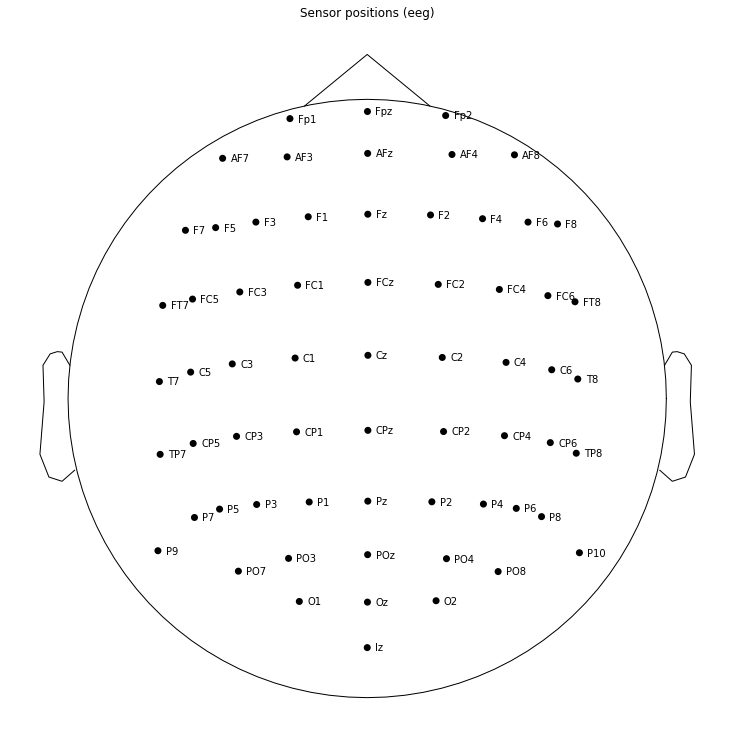

In [144]:
db = loaddb.GIGA_MI_ME()
db.load_subject(1)
print(db.metadata['montage'])
epochs =  db.get_epochs()
montage = epochs.get_montage()
montage.plot(show_names=True);

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 512.0 Hz
>

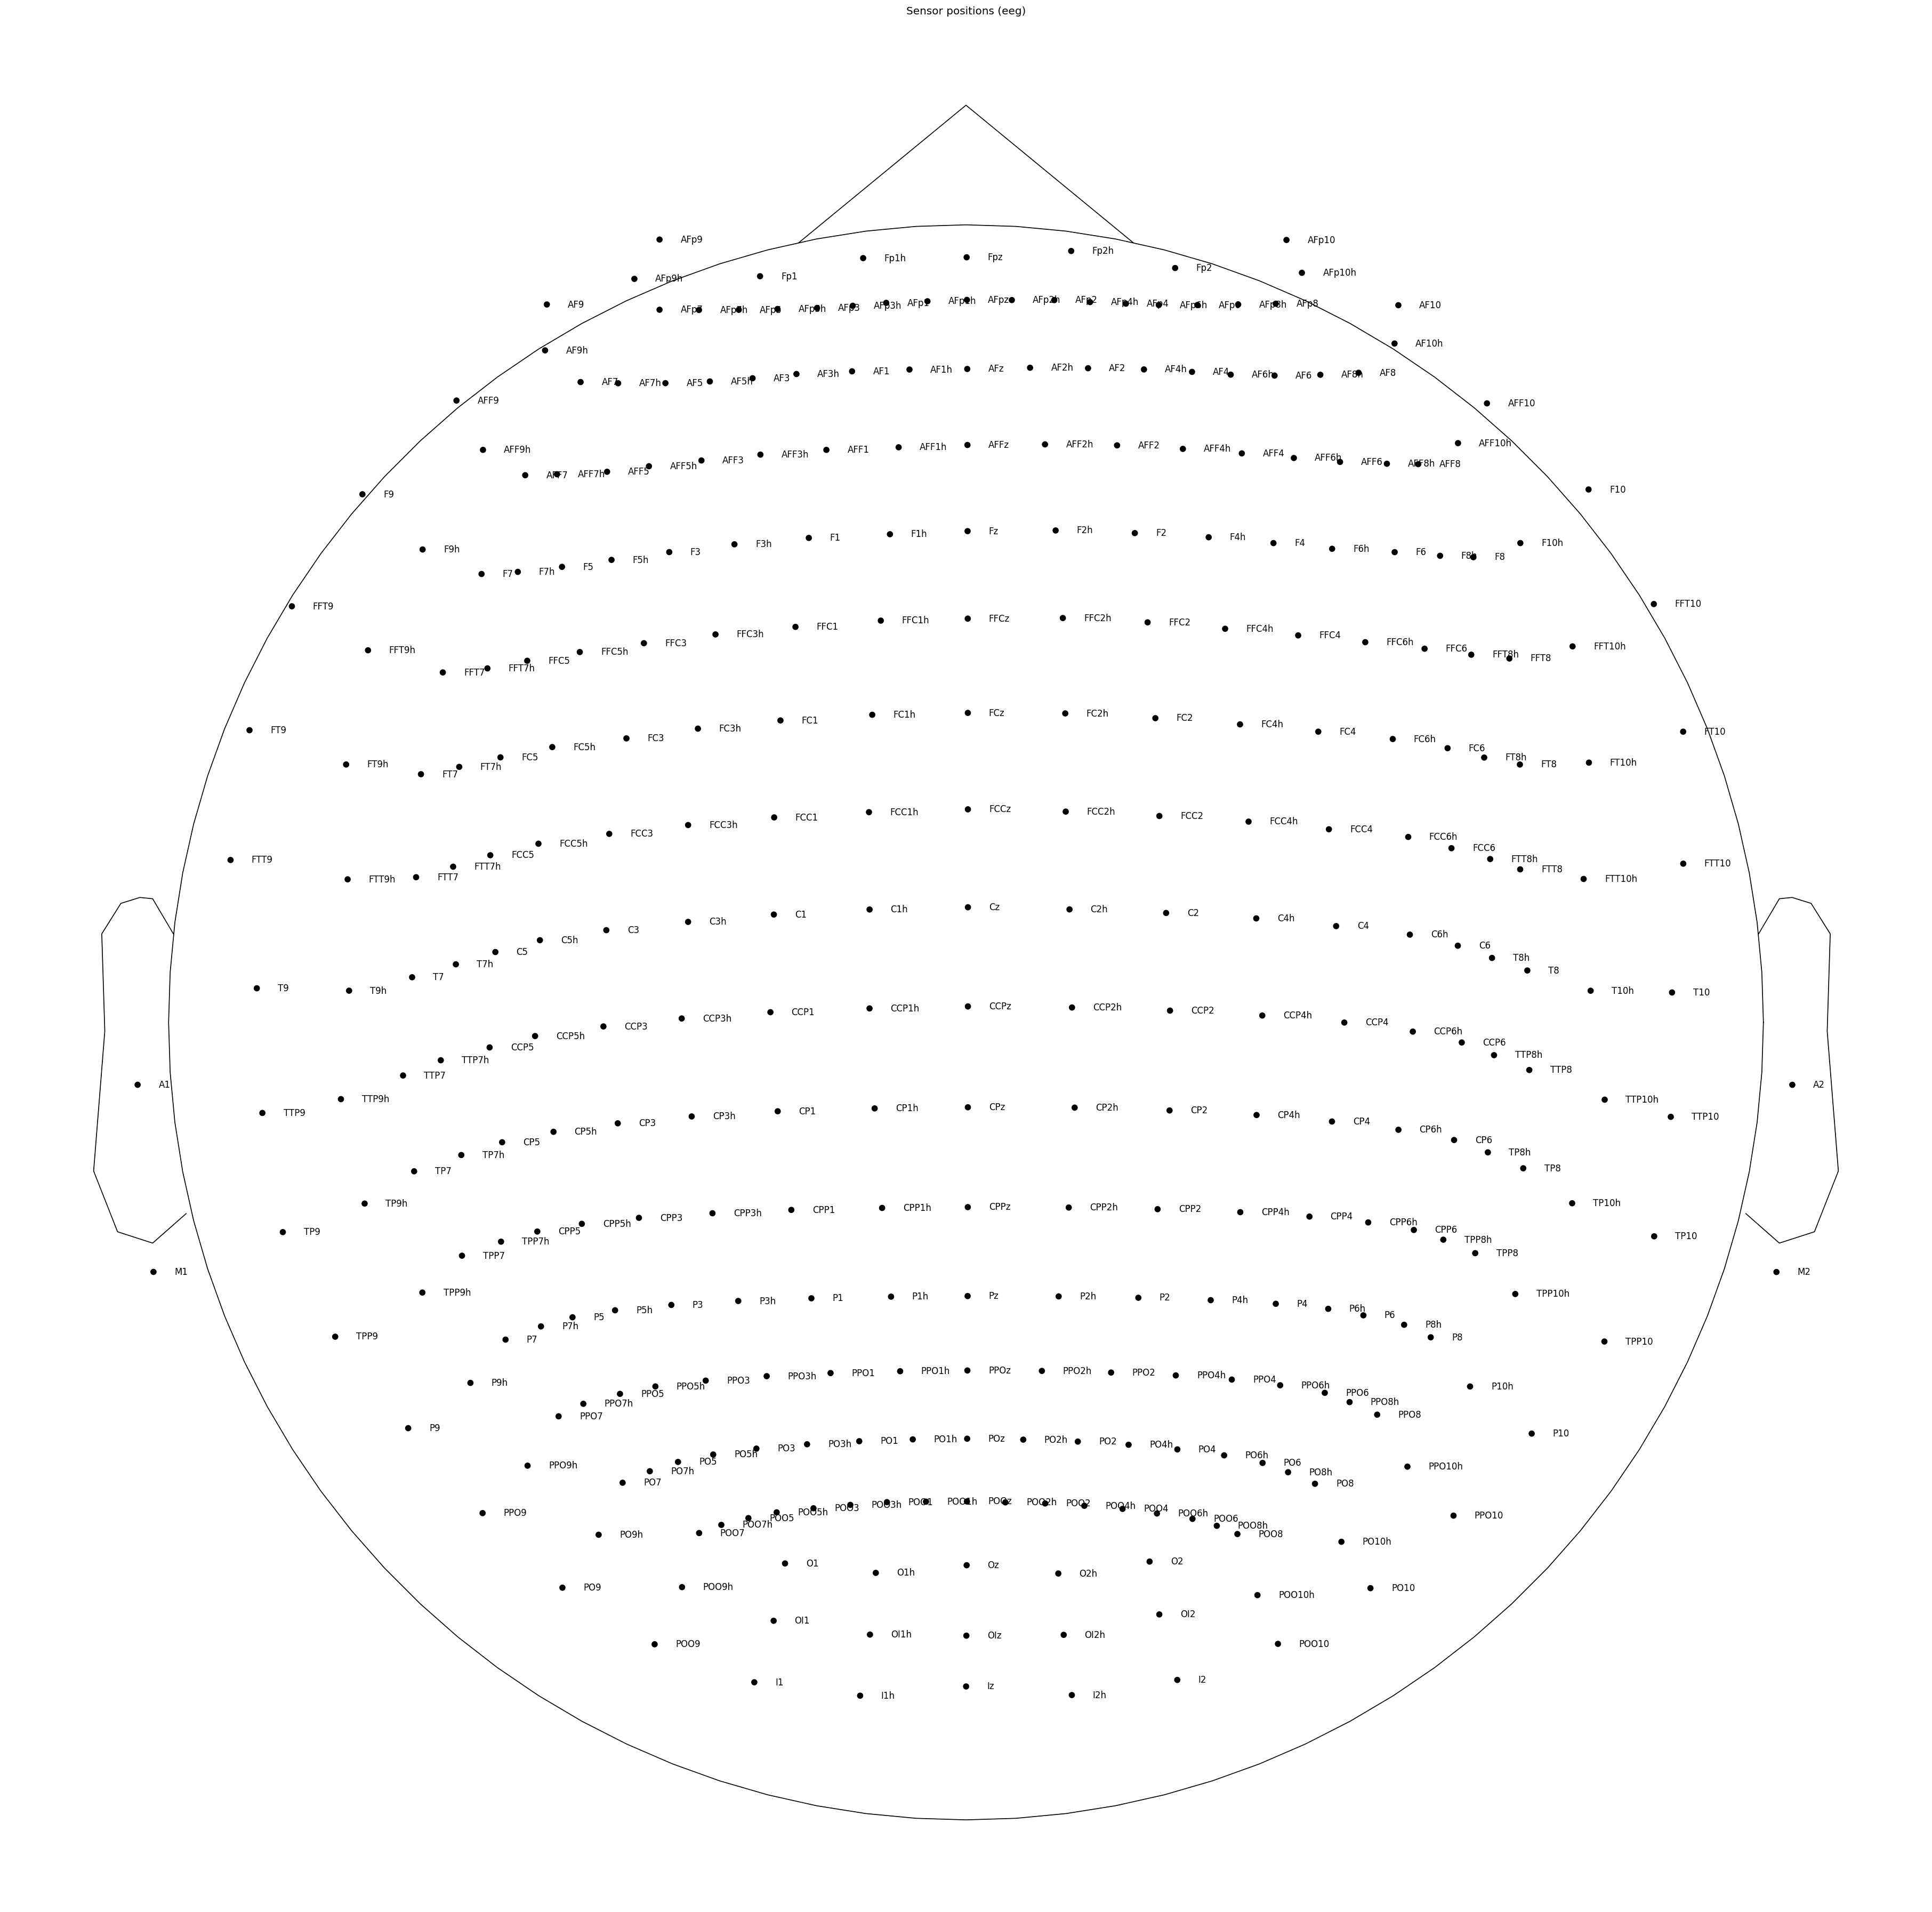

In [119]:
plt.rcParams["figure.figsize"] = (30, 30)
mne.channels.make_standard_montage('standard_1005').plot(show_names=True, show=True);

In [ ]:
def get_sort_value(v):
    
    if match := re.findall('([0-9]+)', v):
        order = int(match[0])
        if int(order) % 2 != 0:
            order = -order
        if v.endswith('h'):
            if order>0:
                order -= 0.5
            else:
                order += 0.5
        return order
    else:
        return 0
    

In [141]:
# # standard_1020
# columns = (
#     ['^Fp[z0-9]{1,2}$'],
#     ['^AF[z0-9]{1,2}$'],
#     ['^F[z0-9]{1,2}$'],
#     ['^FC[z0-9]{1,2}$', '^FT[0-9]{1,2}$'],
#     ['^C[z0-9]{1,2}$', '^T[0-9]{1,2}$'],
#     ['^CP[z0-9]{1,2}$', '^TP[0-9]{1,2}$'],
#     ['^P[z0-9]{1,2}$'],
#     ['^PO[z0-9]{1,2}$'],
#     ['^O[z0-9]{1,2}$'],
#     ['^I[z0-9]{1,2}$'],
# )
# montage_ = mne.channels.make_standard_montage('standard_1020')


# standard_1005
columns = (
    ['^Fp[z0-9]{1,2}[h]*$'],
    ['^AFp[z0-9]{1,2}[h]*$'],
    ['^AF[z0-9]{1,2}[h]*$'],
    ['^AFF[z0-9]{1,2}[h]*$'],
    ['^F[z0-9]{1,2}[h]*$'],    
    ['^FFC[z0-9]{1,2}[h]*$', '^FFT[0-9]{1,2}[h]*$'],
    ['^FC[z0-9]{1,2}[h]*$', '^FT[0-9]{1,2}[h]*$'],
    ['^FCC[z0-9]{1,2}[h]*$', '^FTT[0-9]{1,2}[h]*$'],
    ['^C[z0-9]{1,2}[h]*$', '^T[0-9]{1,2}[h]*$'],    
    ['^CCP[z0-9]{1,2}[h]*$', '^TTP[0-9]{1,2}[h]*$'],   
    ['^CP[z0-9]{1,2}[h]*$', '^TP[0-9]{1,2}[h]*$'], 
    ['^CPP[z0-9]{1,2}[h]*$', '^TPP[0-9]{1,2}[h]*$'], 
    ['^P[z0-9]{1,2}[h]*$'],
    ['^PPO[z0-9]{1,2}[h]*$'],
    ['^PO[z0-9]{1,2}[h]*$'],
    ['^POO[z0-9]{1,2}[h]*$'],
    ['^O[z0-9]{1,2}[h]*$'],
    ['^OI[z0-9]{1,2}[h]*$'],
    ['^I[z0-9]{1,2}[h]*$'],
    
)
montage_ = mne.channels.make_standard_montage('standard_1005')


data = []
for column in columns:
    c = []
    for channel in montage_.ch_names:
        for channelc in column:
            if re.match(channelc, channel):
                c.append(channel)
    data.append(c)


    
data = [sorted(d, key=get_sort_value) for d in data]


max_ = max([len(d) for d in data])
map_ = np.array([np.pad(d, (max_-len(d))//2) for d in data], dtype=object)
map_[map_=='0']=0
r =  map_.shape[0]



for i, ch in enumerate(db.metadata['channel_names']):
    map_[map_==ch] = i+1

    
map_ = np.array([c if isinstance(c, int) else 0 for c in map_.flatten()]).reshape(r, -1)

masq = map_[map_.sum(axis=1)!=0]
masq = ([r[r!=0] for r in masq])
max_w = max([len(m) for m in masq])
masq = np.array([np.pad(d, (max_w-len(d))//2) for d in masq], dtype=int)

return masq


['Fp1', 'Fp1h', 'Fpz', 'Fp2h', 'Fp2']
['AFp9', 'AFp9h', 'AFp7', 'AFp7h', 'AFp5', 'AFp5h', 'AFp3', 'AFp3h', 'AFp1', 'AFp1h', 'AFpz', 'AFp2h', 'AFp2', 'AFp4h', 'AFp4', 'AFp6h', 'AFp6', 'AFp8h', 'AFp8', 'AFp10h', 'AFp10']
['AF9', 'AF9h', 'AF7', 'AF7h', 'AF5', 'AF5h', 'AF3', 'AF3h', 'AF1', 'AF1h', 'AFz', 'AF2h', 'AF2', 'AF4h', 'AF4', 'AF6h', 'AF6', 'AF8h', 'AF8', 'AF10h', 'AF10']
['AFF9', 'AFF9h', 'AFF7', 'AFF7h', 'AFF5', 'AFF5h', 'AFF3', 'AFF3h', 'AFF1', 'AFF1h', 'AFFz', 'AFF2h', 'AFF2', 'AFF4h', 'AFF4', 'AFF6h', 'AFF6', 'AFF8h', 'AFF8', 'AFF10h', 'AFF10']
['F9', 'F9h', 'F7', 'F7h', 'F5', 'F5h', 'F3', 'F3h', 'F1', 'F1h', 'Fz', 'F2h', 'F2', 'F4h', 'F4', 'F6h', 'F6', 'F8h', 'F8', 'F10h', 'F10']
['FFT9', 'FFT9h', 'FFT7', 'FFT7h', 'FFC5', 'FFC5h', 'FFC3', 'FFC3h', 'FFC1', 'FFC1h', 'FFCz', 'FFC2h', 'FFC2', 'FFC4h', 'FFC4', 'FFC6h', 'FFC6', 'FFT8h', 'FFT8', 'FFT10h', 'FFT10']
['FT9', 'FT9h', 'FT7', 'FT7h', 'FC5', 'FC5h', 'FC3', 'FC3h', 'FC1', 'FC1h', 'FCz', 'FC2h', 'FC2', 'FC4h', 'FC4', 'FC6h',

<ipython-input-101-d04fee483c4a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(data)


array([list(['Fp1', 'Fp1h', 'Fpz', 'Fp2h', 'Fp2']),
       list(['AFp9', 'AFp9h', 'AFp7', 'AFp7h', 'AFp5', 'AFp5h', 'AFp3', 'AFp3h', 'AFp1', 'AFp1h', 'AFpz', 'AFp2h', 'AFp2', 'AFp4h', 'AFp4', 'AFp6h', 'AFp6', 'AFp8h', 'AFp8', 'AFp10h', 'AFp10']),
       list(['AF9', 'AF9h', 'AF7', 'AF7h', 'AF5', 'AF5h', 'AF3', 'AF3h', 'AF1', 'AF1h', 'AFz', 'AF2h', 'AF2', 'AF4h', 'AF4', 'AF6h', 'AF6', 'AF8h', 'AF8', 'AF10h', 'AF10']),
       list(['AFF9', 'AFF9h', 'AFF7', 'AFF7h', 'AFF5', 'AFF5h', 'AFF3', 'AFF3h', 'AFF1', 'AFF1h', 'AFFz', 'AFF2h', 'AFF2', 'AFF4h', 'AFF4', 'AFF6h', 'AFF6', 'AFF8h', 'AFF8', 'AFF10h', 'AFF10']),
       list(['F9', 'F9h', 'F7', 'F7h', 'F5', 'F5h', 'F3', 'F3h', 'F1', 'F1h', 'Fz', 'F2h', 'F2', 'F4h', 'F4', 'F6h', 'F6', 'F8h', 'F8', 'F10h', 'F10']),
       list(['FFT9', 'FFT9h', 'FFT7', 'FFT7h', 'FFC5', 'FFC5h', 'FFC3', 'FFC3h', 'FFC1', 'FFC1h', 'FFCz', 'FFC2h', 'FFC2', 'FFC4h', 'FFC4', 'FFC6h', 'FFC6', 'FFT8h', 'FFT8', 'FFT10h', 'FFT10']),
       list(['FT9', 'FT9h', 'FT7', '

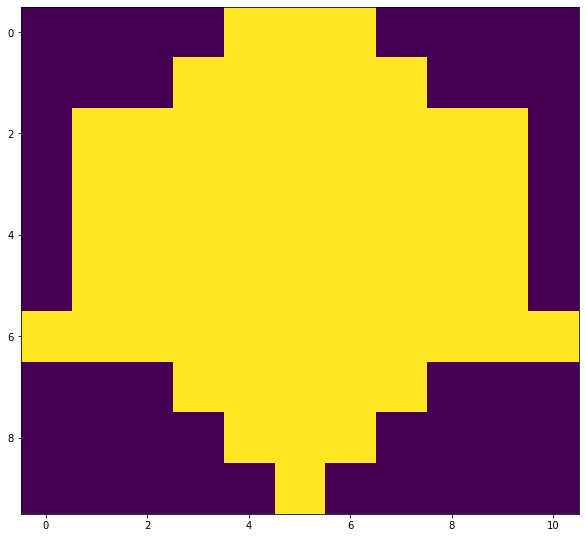

In [143]:
m = masq.copy()
m[m>=1] = 1

plt.rcParams["figure.figsize"] = (10, 10)
plt.imshow(m)

array([[0, 0, 0, 0, 1, 33, 34, 0, 0, 0, 0],
       [0, 0, 0, 2, 3, 37, 36, 35, 0, 0, 0],
       [0, 7, 6, 5, 4, 38, 39, 40, 41, 42, 0],
       [0, 8, 9, 10, 11, 47, 46, 45, 44, 43, 0],
       [0, 15, 14, 13, 12, 48, 49, 50, 51, 52, 0],
       [0, 16, 17, 18, 19, 32, 56, 55, 54, 53, 0],
       [24, 23, 22, 21, 20, 31, 57, 58, 59, 60, 61],
       [0, 0, 0, 25, 26, 30, 63, 62, 0, 0, 0],
       [0, 0, 0, 0, 27, 29, 64, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 28, 0, 0, 0, 0, 0]], dtype=object)

TypeError: Image data of dtype object cannot be converted to float

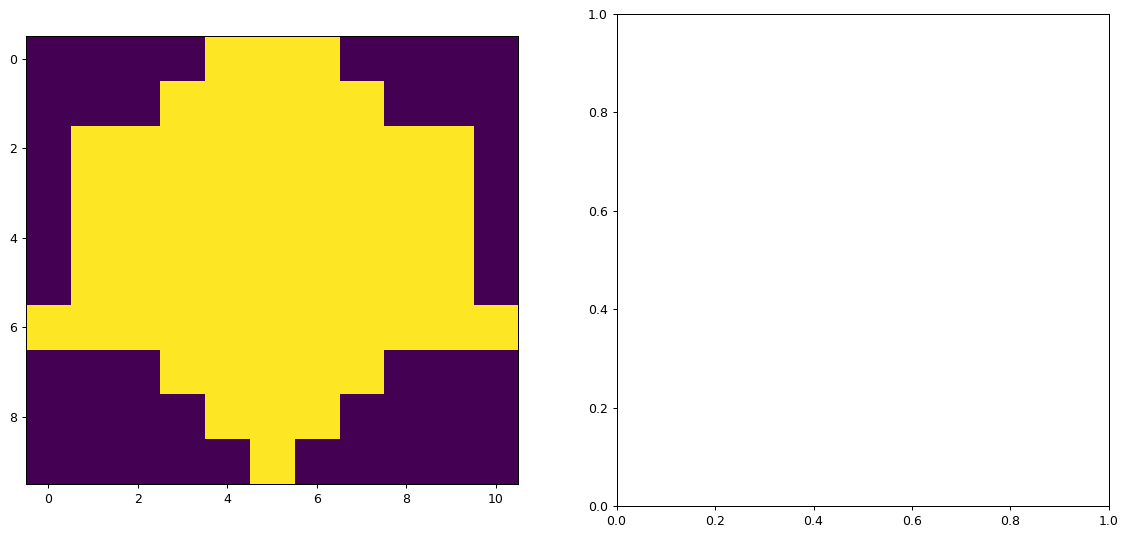

In [196]:
plt.figure(figsize=(24, 8), dpi=90)
plt.subplot(131)
plt.imshow(temp)
plt.subplot(132)
plt.imshow(map_)

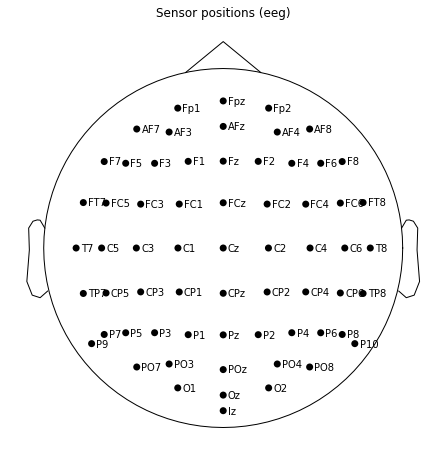

In [25]:
montage = mne.channels.make_standard_montage('biosemi64')
# montage = epochs.get_montage()
montage.plot(show_names=True);

In [7]:
montage.get_positions()[ 'ch_pos']

OrderedDict([('Fp1', array([-0.02933873,  0.09029533, -0.00331545])),
             ('AF7', array([-0.05580558,  0.0768098 , -0.00331545])),
             ('AF3', array([-0.03859344,  0.0827639 ,  0.02618555])),
             ('F1', array([-0.0272617 ,  0.06747508,  0.06106482])),
             ('F3', array([-0.05177571,  0.06393767,  0.0475    ])),
             ('F5', array([-0.06925438,  0.06020191,  0.02458781])),
             ('F7', array([-0.0768098 ,  0.05580558, -0.00331545])),
             ('FT7', array([-0.09029533,  0.02933873, -0.00331545])),
             ('FC5', array([-0.08434934,  0.03237868,  0.02935661])),
             ('FC3', array([-0.06425582,  0.03416543,  0.06106482])),
             ('FC1', array([-0.0355974 ,  0.0355974 ,  0.08056457])),
             ('C1', array([-0.03711946, -0.        ,  0.08744796])),
             ('C3', array([-0.06833728, -0.        ,  0.06599255])),
             ('C5', array([-0.08869014, -0.        ,  0.03404496])),
             ('T7', array([

In [45]:
positions = montage.get_positions()[ 'ch_pos']
p = np.array([positions[target][:2] for target in positions])
p.min(), p.max()

(-0.0949421285668141, 0.0949421285668141)

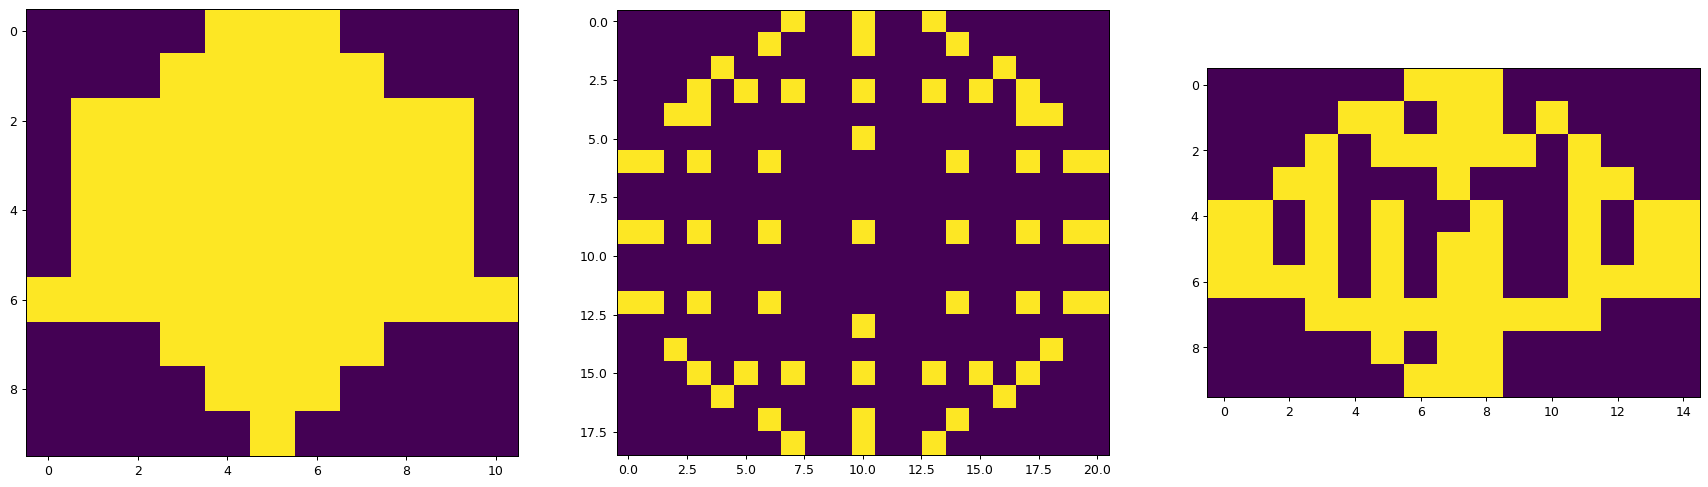

In [76]:
M, N = 18, 20
indices_x = np.linspace(-p.max(), p.max(), N+1)
indices_y = np.linspace(-p.max(), p.max(), M+1)
mat = np.zeros((M+1, N+1))

positions = montage.get_positions()[ 'ch_pos']
for ch in positions:
    target = positions[ch]
    q = [np.argmin(abs(indices_x - target[0])), np.argmin(abs(indices_y - target[1]))]
    
    mat[q[1], q[0]] = 1

plt.figure(figsize=(24, 8), dpi=90)
plt.subplot(131)
plt.imshow(temp)
plt.subplot(132)
plt.imshow(mat)
plt.subplot(133)
plt.imshow(reduce(mat))

In [19]:
temp = [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]]

In [27]:
temp = [[0, 0, 0, 0, 1, 33, 34, 0, 0, 0, 0],
        [0, 0, 0, 2, 3, 37, 36, 35, 0, 0, 0],
        [0, 7, 6, 5, 4, 38, 39, 40, 41, 42, 0],
        [0, 8, 9, 10, 11, 47, 46, 45, 44, 43, 0],
        [0, 15, 14, 13, 12, 48, 49, 50, 51, 52, 0],
        [0, 16, 17, 18, 19, 32, 56, 55, 54, 53, 0],
        [24, 23, 22, 21, 20, 31, 57, 58, 59, 60, 61],
        [0, 0, 0, 25, 26, 30, 63, 62, 0, 0, 0],
        [0, 0, 0, 0, 27, 29, 64, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 28, 0, 0, 0, 0, 0]]

temp = np.array(temp)
temp[temp>1] = 1

In [13]:
def reduce(mat):

    reduced_y = [mat[0]]
    for r in range(1, mat.shape[0]):
        if max(reduced_y[-1] + mat[r]) <= 1:
            reduced_y[-1] += mat[r]
        else:
            reduced_y.append(mat[r])


    reduced_y = np.array(reduced_y).T
    reduced_x = [reduced_y[0]] 
    for r in range(1, np.array(reduced_y).shape[0]):
        if max(reduced_x[-1] + reduced_y[r]) <= 1:
            reduced_x[-1] += reduced_y[r]
        else:
            reduced_x.append(reduced_y[r])
            
    return np.array(reduced_x).T

In [45]:
def reduce(map_):
    
    mat = map_.copy()

    idx = np.array([i if sum(r) else -1 for i, r in enumerate(mat)])
    mat = mat[idx[idx!=-1]]

    mat = mat.T

    idx = np.array([i if sum(r) else -1 for i, r in enumerate(mat)])
    mat = mat[idx[idx!=-1]]

    return mat.T

In [86]:
map_

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0, 33,  0, 34,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  3,  0,  0,  0, 37,  0,  0,  0,
        36,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  6,  0,  5,  0,  4,  0, 38,  0, 39,  0,
        40,  0, 41,  0,  0,  0, 42,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  9,  0, 10,  0, 11,  0, 47,  0, 46,  0,
        45,  0, 44,  0, 43,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0, 14,  0,  0, 13,  0, 12,  0, 48,  0, 

In [105]:
reduce(map_)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0, 33,  0, 34,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  3,  0,  0,  0, 37,  0,  0,  0,
        36,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  6,  0,  5,  0,  4,  0, 38,  0, 39,  0,
        40,  0, 41,  0,  0,  0, 42,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  9,  0, 10,  0, 11,  0, 47,  0, 46,  0,
        45,  0, 44,  0, 43,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0, 14,  0,  0, 13,  0, 12,  0, 48,  0, 49,  0,
        50,  0,  0, 51, 52,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0, 17,  0, 18,  0, 19,  0, 32,  0, 56,  0,
        55,  0, 54,  0,  0, 53,  0,  0,  0],
       [ 0,  0, 24, 23,  0,  0, 22,  0, 21,  0, 20,  0, 31,  0, 57,  0,
        58,  0, 59,  0, 60,  0, 61,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0, 26,  0,  0,  0, 30,  0,  0,  0,
        63,  0,  0,  0,  0, 62,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 27,  0, 29,  0, 

In [36]:
q = ['AF7', 'AF9h', 'AF7h', 'AF9', 'AF5', 'AF5h', 'AF3', 'AF3h', 'AF1', 'AF1h', 
     'AFz',
     'AF2h', 'AF2', 'AF4h', 'AF4', 'AF6h', 'AF6', 'AF10', 'AF8h', 'AF8', 'AF10h']
# q =sort_channels(q)
q

['AF7',
 'AF9h',
 'AF7h',
 'AF9',
 'AF5',
 'AF5h',
 'AF3',
 'AF3h',
 'AF1',
 'AF1h',
 'AFz',
 'AF2h',
 'AF2',
 'AF4h',
 'AF4',
 'AF6h',
 'AF6',
 'AF10',
 'AF8h',
 'AF8',
 'AF10h']

In [43]:
sorted(q, key=get_sort_value)

['AF9',
 'AF9h',
 'AF7',
 'AF7h',
 'AF5',
 'AF5h',
 'AF3',
 'AF3h',
 'AF1',
 'AF1h',
 'AFz',
 'AF2h',
 'AF2',
 'AF4h',
 'AF4',
 'AF6h',
 'AF6',
 'AF8h',
 'AF8',
 'AF10h',
 'AF10']

In [42]:
def get_sort_value(v):
    
    if match := re.findall('([0-9]+)', v):
        order = int(match[0])
        
        if int(order) % 2 != 0:
            order = -order
            
        
        if v.endswith('h'):
            if order>0:
                order -= 0.5
            else:
                order += 0.5
            
        return order
        
    else:
        return 0
    

In [27]:
int(re.findall('([0-9]+)', 'AFz')[0])

IndexError: list index out of range

In [149]:
[w.removesuffix('y') for w in sorted([_.ljust(4, 'y') for _ in q[:len(q)//2]])[::-1]]

['AF9', 'AF9h', 'AF7', 'AF7h', 'AF5', 'AF5h', 'AF3', 'AF3h', 'AF1', 'AF1h']

In [161]:
orted([_.ljust(4, 'y') for _ in q[len(q)//2+1:]])[::-1]]

['AF8y',
 'AF8h',
 'AF6y',
 'AF6h',
 'AF4y',
 'AF4h',
 'AF2y',
 'AF2h',
 'AF10h',
 'AF10']

In [125]:
def sort_channels(target)

    q = [_[0] for _ in sorted([(tg, montage_.get_positions()['ch_pos'][tg][0]) for tg in target], key=lambda x: x[1])]


In [149]:
[array([1, 2]), array([57, 58, 59, 60]), array([55,  3,  4,  5,  6,  7, 56]), array([45,  8, 33,  9, 10, 34, 11, 50]), array([12, 35, 13, 36, 14, 37, 15, 38, 16]), array([17, 48, 18, 39, 19, 40, 20, 41, 21, 53, 22]), array([23, 24, 42, 25, 43, 26, 27]), array([28, 61, 44, 62, 32]), array([29, 30, 31])]

NameError: name 'array' is not defined

In [30]:
masq = [[1, 3, 2], [102, 103], [38, 39, 79, 40, 41], [104, 78, 80, 105], [4, 42, 5, 43, 6, 44, 7, 45, 8], [106, 81, 82, 107, 108, 83, 84, 109], [70, 64, 9, 46, 10, 47, 11, 48, 12, 65, 71], [110, 111, 85, 86, 112, 113, 87, 88, 114, 115], [14, 49, 15, 50, 16, 51, 17, 52, 18], [116, 89, 90, 117, 118, 91, 92, 119], [66, 20, 53, 21, 54, 22, 55, 23, 67], [72, 120, 93, 94, 121, 122, 95, 96, 123, 73], [76, 24, 56, 25, 57, 26, 58, 27, 59, 28, 77], [124, 125, 97, 98, 126, 127], [74, 68, 60, 61, 29, 62, 63, 69, 75], [128, 129, 130, 131], [30, 31, 32], [132, 133], [99, 100, 101]]
max_w = max([len(m) for m in masq])
print(max_w)
[print(m) for m in masq];

11
[1, 3, 2]
[102, 103]
[38, 39, 79, 40, 41]
[104, 78, 80, 105]
[4, 42, 5, 43, 6, 44, 7, 45, 8]
[106, 81, 82, 107, 108, 83, 84, 109]
[70, 64, 9, 46, 10, 47, 11, 48, 12, 65, 71]
[110, 111, 85, 86, 112, 113, 87, 88, 114, 115]
[14, 49, 15, 50, 16, 51, 17, 52, 18]
[116, 89, 90, 117, 118, 91, 92, 119]
[66, 20, 53, 21, 54, 22, 55, 23, 67]
[72, 120, 93, 94, 121, 122, 95, 96, 123, 73]
[76, 24, 56, 25, 57, 26, 58, 27, 59, 28, 77]
[124, 125, 97, 98, 126, 127]
[74, 68, 60, 61, 29, 62, 63, 69, 75]
[128, 129, 130, 131]
[30, 31, 32]
[132, 133]
[99, 100, 101]


In [32]:
masq

[[1, 3, 2],
 [102, 0, 103],
 [38, 39, 79, 40, 41],
 [104, 78, 0, 80, 105],
 [4, 42, 5, 43, 6, 44, 7, 45, 8],
 [106, 81, 82, 107, 0, 108, 83, 84, 109],
 [70, 64, 9, 46, 10, 47, 11, 48, 12, 65, 71],
 [110, 111, 85, 86, 112, 0, 113, 87, 88, 114, 115],
 [14, 49, 15, 50, 16, 51, 17, 52, 18],
 [116, 89, 90, 117, 0, 118, 91, 92, 119],
 [66, 20, 53, 21, 54, 22, 55, 23, 67],
 [72, 120, 93, 94, 121, 0, 122, 95, 96, 123, 73],
 [76, 24, 56, 25, 57, 26, 58, 27, 59, 28, 77],
 [124, 125, 97, 0, 98, 126, 127],
 [74, 68, 60, 61, 29, 62, 63, 69, 75],
 [128, 129, 0, 130, 131],
 [30, 31, 32],
 [132, 0, 133],
 [99, 100, 101]]

In [31]:
for row in masq:
    if len(row) % 2 == 0:
        c = len(row)//2
        row.insert(c, 0)